## This analysis provides valube insights into sales ,profit customer behavior, and product performance within the superStore dataset. The findings highlight trends, patterns, and opportunities for optimzing sales and profitablity 

### Customer clustring : used to segment customers based on Purchasing behavior ,ading in targeted markting and personalized experiences

In [3]:
#What are the top-selling products in the superstore?
#What is the sales trend over time (monthly, yearly)?
#Which region generates the most sales?
#What is the impact of discounts and promotions on sales?
#Which sub-category of products has the highest demand?

## understand which products, regions, categories, and customer segments they should target or avoid

In [5]:
import numpy as np
import pandas as pd

In [6]:
df = pd.read_csv("Superstore.csv", encoding="latin")

In [7]:
df.head()

Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10001798        Furniture    Bookcases   
1       42420   South  FUR-CH-10000454        Furniture       Chairs   
2       90036    West  OFF-LA-10000240  Office Supplies       Labels   
3       33311   South  FUR-TA-10000577        Furniture       Tables   
4       33311   South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164  

[5 rows x 21 columns]

In [8]:
df = df.drop(columns = "Row ID")

| Column Name       | Description                                                                                 |
| ----------------- | ------------------------------------------------------------------------------------------- |
| **Order ID**      | Unique ID for each order placed.                                                            |
| **Order Date**    | Date when the order was placed (needs to be converted to datetime for time-based analysis). |
| **Ship Date**     | Date when the order was shipped.                                                            |
| **Ship Mode**     | Shipping method used (e.g., Standard Class, First Class).                                   |
| **Customer ID**   | Unique identifier for the customer.                                                         |
| **Customer Name** | Full name of the customer.                                                                  |
| **Segment**       | Type of customer: Consumer, Corporate, or Home Office.                                      |
| **Country**       | Country of the customer (likely all "United States" if it’s the Superstore dataset).        |
| **City**          | City of the customer.                                                                       |
| **State**         | State of the customer.                                                                      |
| **Postal Code**   | ZIP or postal code of the customer.                                                         |
| **Region**        | Regional zone (e.g., West, East, South, Central).                                           |
| **Product ID**    | Unique identifier for the product.                                                          |
| **Category**      | High-level product category (e.g., Furniture, Office Supplies, Technology).                 |
| **Sub-Category**  | More detailed product grouping (e.g., Chairs, Phones, Binders).                             |
| **Product Name**  | Full name of the product.                                                                   |
| **Sales**         | Total sales revenue from the product in that order line.                                    |
| **Quantity**      | Number of units sold.                                                                       |
| **Discount**      | Discount applied to the sale (ranging from 0 to 1).                                         |
| **Profit**        | Net profit earned from the sale (after costs and discount).                                 |


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Order Date     9994 non-null   object 
 2   Ship Date      9994 non-null   object 
 3   Ship Mode      9994 non-null   object 
 4   Customer ID    9994 non-null   object 
 5   Customer Name  9994 non-null   object 
 6   Segment        9994 non-null   object 
 7   Country        9994 non-null   object 
 8   City           9994 non-null   object 
 9   State          9994 non-null   object 
 10  Postal Code    9994 non-null   int64  
 11  Region         9994 non-null   object 
 12  Product ID     9994 non-null   object 
 13  Category       9994 non-null   object 
 14  Sub-Category   9994 non-null   object 
 15  Product Name   9994 non-null   object 
 16  Sales          9994 non-null   float64
 17  Quantity       9994 non-null   int64  
 18  Discount

In [11]:
df.duplicated().sum()

1

In [12]:
df.isna().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [13]:
df.describe()

Postal Code         Sales     Quantity     Discount       Profit
count   9994.000000   9994.000000  9994.000000  9994.000000  9994.000000
mean   55190.379428    229.858001     3.789574     0.156203    28.656896
std    32063.693350    623.245101     2.225110     0.206452   234.260108
min     1040.000000      0.444000     1.000000     0.000000 -6599.978000
25%    23223.000000     17.280000     2.000000     0.000000     1.728750
50%    56430.500000     54.490000     3.000000     0.200000     8.666500
75%    90008.000000    209.940000     5.000000     0.200000    29.364000
max    99301.000000  22638.480000    14.000000     0.800000  8399.976000

#### There is negative profit values

In [15]:
df[df["Profit"] < 0].shape

(1871, 20)

In [16]:
df[df["Profit"] < 0].head(3)

Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
3   US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
14  US-2015-118983  11/22/2015  11/26/2015  Standard Class    HP-14815   
15  US-2015-118983  11/22/2015  11/26/2015  Standard Class    HP-14815   

     Customer Name      Segment        Country             City    State  \
3   Sean O'Donnell     Consumer  United States  Fort Lauderdale  Florida   
14   Harold Pawlan  Home Office  United States       Fort Worth    Texas   
15   Harold Pawlan  Home Office  United States       Fort Worth    Texas   

    Postal Code   Region       Product ID         Category Sub-Category  \
3         33311    South  FUR-TA-10000577        Furniture       Tables   
14        76106  Central  OFF-AP-10002311  Office Supplies   Appliances   
15        76106  Central  OFF-BI-10000756  Office Supplies      Binders   

                                         Product Name     Sales  Quantity  \
3       Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
14  Holmes Replacement Filter for HEPA Air Cleaner...   68.8100         5   
15   Storex DuraTech Recycled Plastic Frosted Binders    2.5440         3   

    Discount   Profit  
3       0.45 -383.031  
14      0.80 -123.858  
15      0.80   -3.816

In [17]:
df[(df["Profit"] < 0) & (df["Discount"] == 0)]

Empty DataFrame
Columns: [Order ID, Order Date, Ship Date, Ship Mode, Customer ID, Customer Name, Segment, Country, City, State, Postal Code, Region, Product ID, Category, Sub-Category, Product Name, Sales, Quantity, Discount, Profit]
Index: []

#### When the discount is 0 there is no negative profit
#### This means the negative profit comes from:
#####      1-Excessive discount eating into margin. 
#####      2-Fixed costs making small-margin items unprofitable when discounted
#####      3-Sales strategies pushing low-profit products to move inventory.

#### Conclusion
##### Negative profit is not due to shipping costs or bad products alone — it's primarily due to discounting.

In [20]:
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Ship Date"] = pd.to_datetime(df["Ship Date"])

#### Converting date columns
##### Direct extraction of year and month for time analysis

##### df['Order Year'] = df['Order Date'].dt.year
##### df['Order Month'] = df['Order Date'].dt.month

In [22]:
df['Shipping Time'] = (df['Ship Date'] - df['Order Date']).dt.days

##### Shipping Time column for delivery quality analysis

##### Note: this columns represents the time taken start shipping not the delivery time

In [25]:
df.describe(include=['object'])

Order ID       Ship Mode Customer ID  Customer Name   Segment  \
count             9994            9994        9994           9994      9994   
unique            5009               4         793            793         3   
top     CA-2017-100111  Standard Class    WB-21850  William Brown  Consumer   
freq                14            5968          37             37      5191   

              Country           City       State Region       Product ID  \
count            9994           9994        9994   9994             9994   
unique              1            531          49      4             1862   
top     United States  New York City  California   West  OFF-PA-10001970   
freq             9994            915        2001   3203               19   

               Category Sub-Category     Product Name  
count              9994         9994             9994  
unique                3           17             1850  
top     Office Supplies      Binders  Staple envelope  
freq               6026         1523               48

#### We don't need the column "Country" all sales are in united states

In [27]:
df["State"].nunique()

49

In [28]:
df["City"].unique()

array(['Henderson', 'Los Angeles', 'Fort Lauderdale', 'Concord',
       'Seattle', 'Fort Worth', 'Madison', 'West Jordan', 'San Francisco',
       'Fremont', 'Philadelphia', 'Orem', 'Houston', 'Richardson',
       'Naperville', 'Melbourne', 'Eagan', 'Westland', 'Dover',
       'New Albany', 'New York City', 'Troy', 'Chicago', 'Gilbert',
       'Springfield', 'Jackson', 'Memphis', 'Decatur', 'Durham',
       'Columbia', 'Rochester', 'Minneapolis', 'Portland', 'Saint Paul',
       'Aurora', 'Charlotte', 'Orland Park', 'Urbandale', 'Columbus',
       'Bristol', 'Wilmington', 'Bloomington', 'Phoenix', 'Roseville',
       'Independence', 'Pasadena', 'Newark', 'Franklin', 'Scottsdale',
       'San Jose', 'Edmond', 'Carlsbad', 'San Antonio', 'Monroe',
       'Fairfield', 'Grand Prairie', 'Redlands', 'Hamilton', 'Westfield',
       'Akron', 'Denver', 'Dallas', 'Whittier', 'Saginaw', 'Medina',
       'Dublin', 'Detroit', 'Tampa', 'Santa Clara', 'Lakeville',
       'San Diego', 'Brentwood', 'Cha

In [29]:
df["Region"].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [30]:
df["Category"].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

##### The store sale 3 types of products: 'Furniture', 'Office Supplies', 'Technology'

#### Sub categories of each category:

In [33]:
df.loc[df["Category"] == "Furniture", "Sub-Category"].unique()

array(['Bookcases', 'Chairs', 'Tables', 'Furnishings'], dtype=object)

In [34]:
df.loc[df["Category"] == "Office Supplies", "Sub-Category"].unique()

array(['Labels', 'Storage', 'Art', 'Binders', 'Appliances', 'Paper',
       'Envelopes', 'Fasteners', 'Supplies'], dtype=object)

In [35]:
df.loc[df["Category"] == "Technology", "Sub-Category"].unique()

array(['Phones', 'Accessories', 'Machines', 'Copiers'], dtype=object)

##### No errors found in categorical columns

### Feature Engineering for vizualization

In [38]:
df["Order Month"] = df["Order Date"].dt.month
df["Order Year"] = df["Order Date"].dt.year
df["Order Weekday"] = df["Order Date"].dt.day_name()
df["Order Quarter"] = df["Order Date"].dt.quarter

#### Analyzing trend over year and month 

In [40]:
av_time_to_ship = df["Shipping Time"].mean()

df["Late Ship"] = df["Shipping Time"] > av_time_to_ship

#### Flag used to quickly analyze if there is states or categories always are late to ship

In [42]:
df["Customer Name"].nunique()

793

In [43]:
df["Customer ID"].nunique()

793

In [44]:
customer_sales = df.groupby("Customer Name").agg({
    "Sales": "sum", "Profit": "sum", "Order ID": "nunique"}).rename(columns = {"Order ID": "Total Orders"}).reset_index()

customer_sales

Customer Name     Sales     Profit  Total Orders
0         Aaron Bergman   886.156   129.3465             3
1         Aaron Hawkins  1744.700   365.2152             7
2        Aaron Smayling  3050.692  -253.5746             7
3       Adam Bellavance  7755.620  2054.5885             8
4             Adam Hart  3250.337   281.1890            10
..                  ...       ...        ...           ...
788        Xylona Preis  2374.658   621.2300            11
789       Yana Sorensen  6720.444  1778.2923             8
790      Yoseph Carroll  5454.350  1305.6290             5
791    Zuschuss Carroll  8025.707 -1032.1490            13
792  Zuschuss Donatelli  1493.944   249.1307             5

[793 rows x 4 columns]

#### To identfy top customers and customers who by within discounts "with negative profit and high orders count"

In [46]:
product_stats = df.groupby("Product Name").agg({
    "Sales": "sum",
    "Profit": "sum",
    "Quantity": "sum"
}).reset_index()

#### To identfy top Products from sales ore profit POV

In [48]:
category = df.groupby("Category").agg({
    "Sales": "sum",
    "Profit": "sum",
    "Quantity": "sum"
}).reset_index()

#### use: .sort_values(columnName) 

#### To identfy which category sale and profit more

In [51]:
category

Category        Sales       Profit  Quantity
0        Furniture  741999.7953   18451.2728      8028
1  Office Supplies  719047.0320  122490.8008     22906
2       Technology  836154.0330  145454.9481      6939

##### Technology has the least quantity sold and the highest profit

In [53]:
state_summary = df.groupby("State")[["Sales", "Profit", "Quantity"]].sum().reset_index()

In [54]:
state_summary.head(3)

State      Sales     Profit  Quantity
0   Alabama  19510.640  5786.8253       256
1   Arizona  35282.001 -3427.9246       862
2  Arkansas  11678.130  4008.6871       240

### Visualization

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

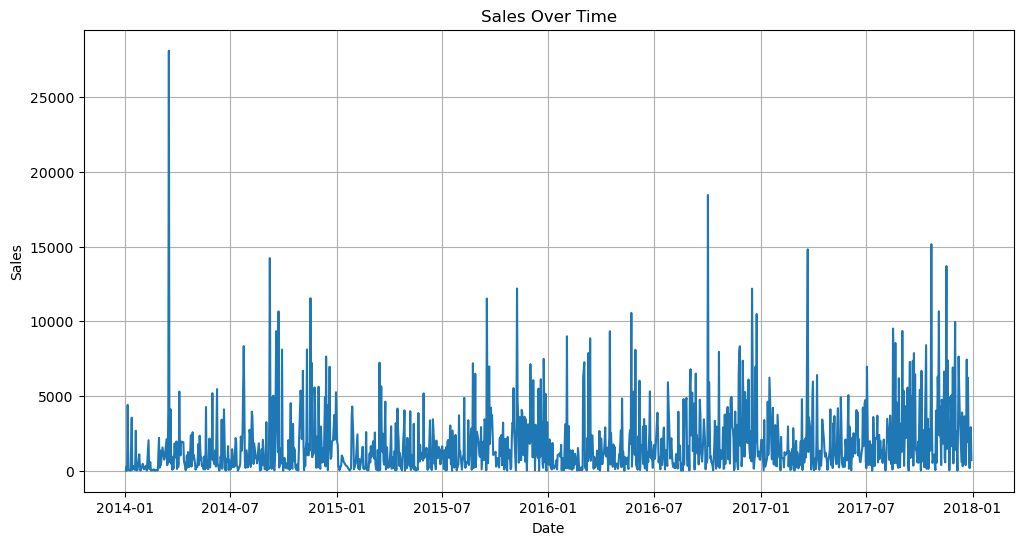

In [57]:
daily_sales = df.groupby('Order Date')['Sales'].sum()
plt.figure(figsize=(12, 6))
plt.plot(daily_sales)
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

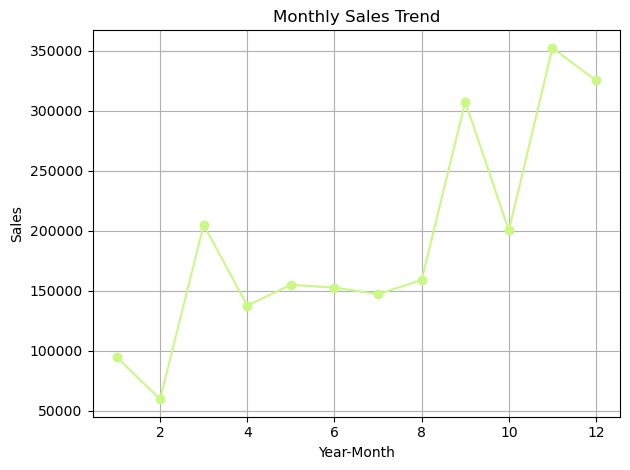

In [58]:
monthly_sales = df.groupby('Order Month')['Sales'].sum()
monthly_sales.plot(marker='o', linestyle='-',color='#CAF884')
plt.title('Monthly Sales Trend')
plt.xlabel('Year-Month')
plt.ylabel('Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

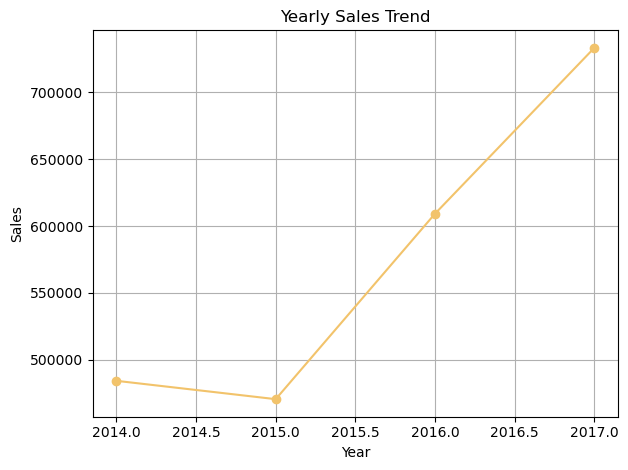

In [59]:
monthly_sales = df.groupby('Order Year')['Sales'].sum()
monthly_sales.plot(marker='o', linestyle='-',color='#F2C36B')
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

In [60]:
df_places = df[['Country','City','State','Region','Sales']]
df_places.head(5)

Country             City       State Region     Sales
0  United States        Henderson    Kentucky  South  261.9600
1  United States        Henderson    Kentucky  South  731.9400
2  United States      Los Angeles  California   West   14.6200
3  United States  Fort Lauderdale     Florida  South  957.5775
4  United States  Fort Lauderdale     Florida  South   22.3680

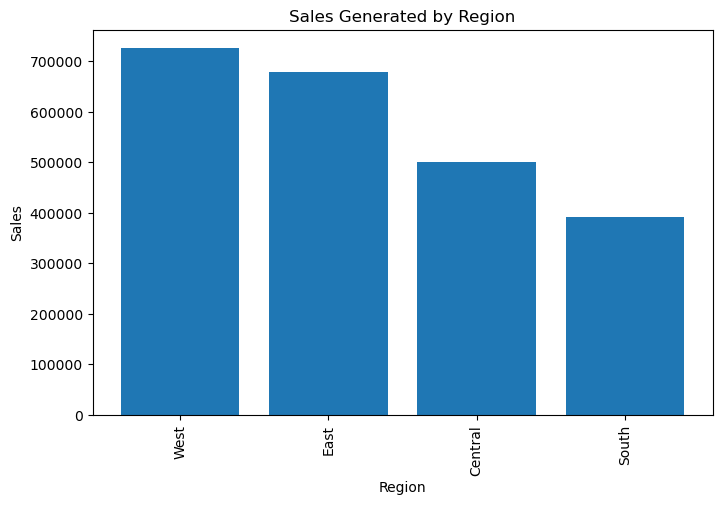

In [61]:
grouped_data = df_places.groupby(['Region'], as_index=False).sum()
grouped_data.sort_values(by='Sales', ascending=False, inplace=True)
plt.figure(figsize=(8,5))
plt.bar(grouped_data['Region'], grouped_data['Sales'], align='center',)
plt.xlabel("Region")
plt.ylabel("Sales")
plt.title("Sales Generated by Region")
plt.xticks(rotation=90)
plt.show()

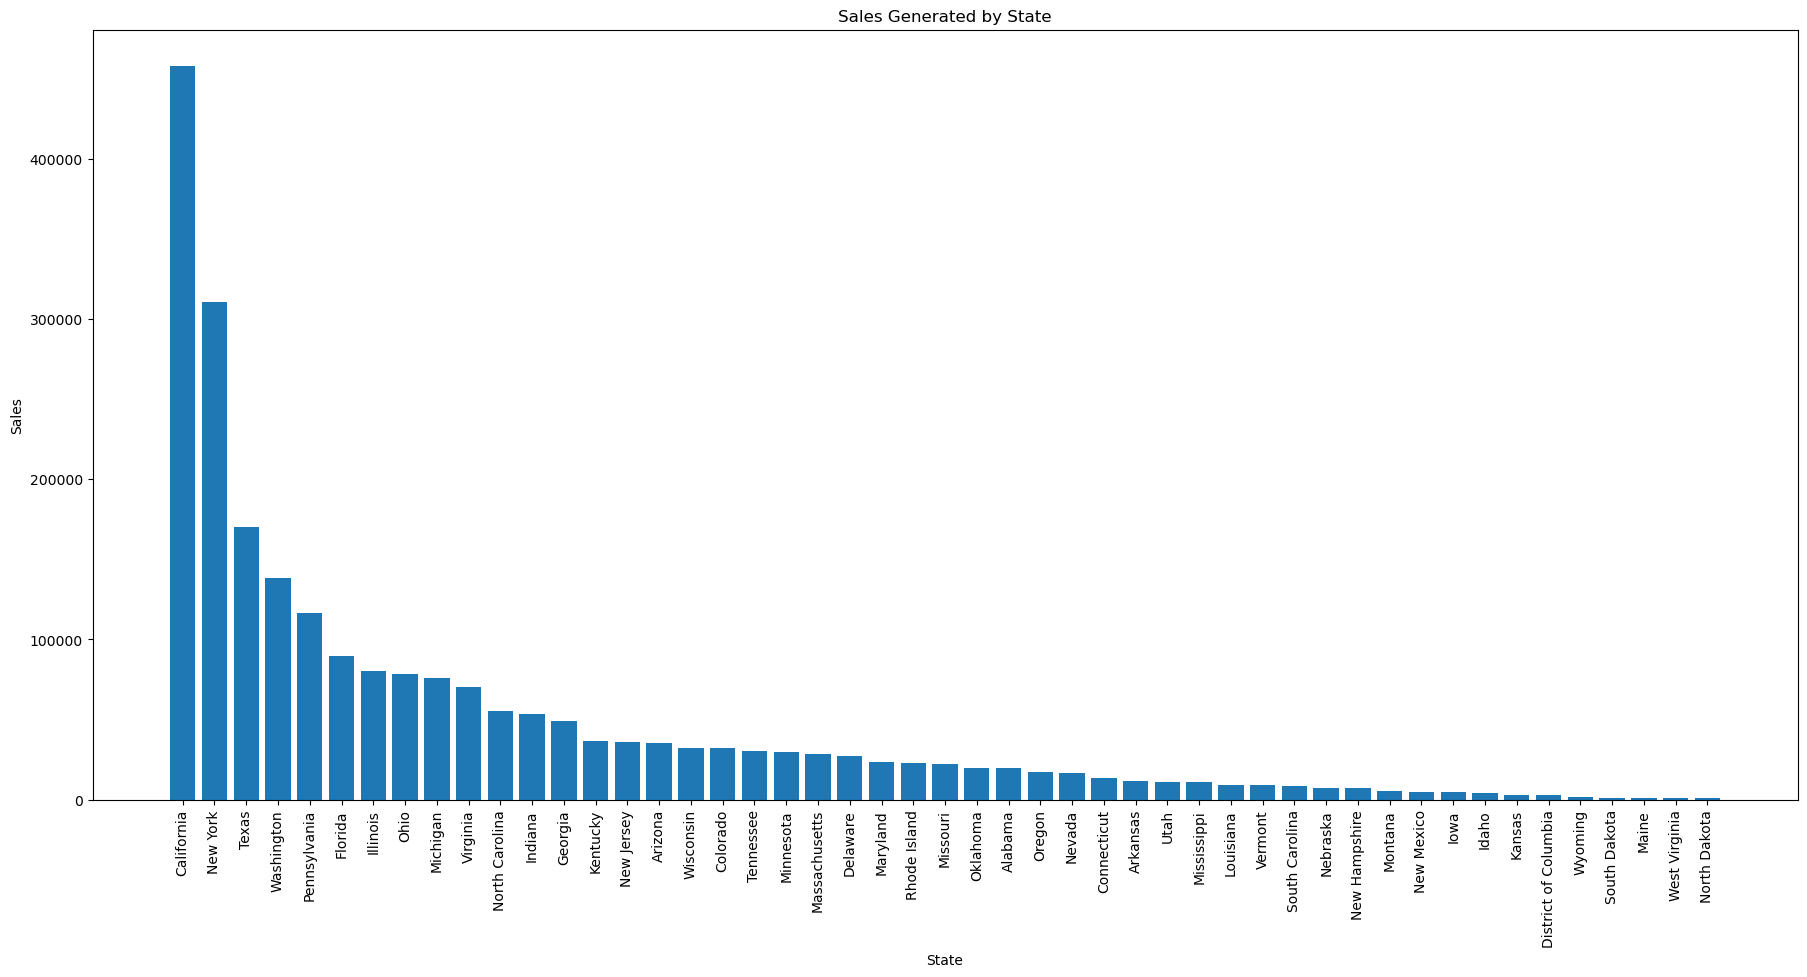

In [62]:
grouped_data = df_places.groupby(['State'], as_index=False).sum()
grouped_data.sort_values(by='Sales', ascending=False, inplace=True)
plt.figure(figsize=(22,10))
plt.bar(grouped_data['State'], grouped_data['Sales'], align='center',)
plt.xlabel("State")
plt.ylabel("Sales")
plt.title("Sales Generated by State")
plt.xticks(rotation=90)
plt.show()

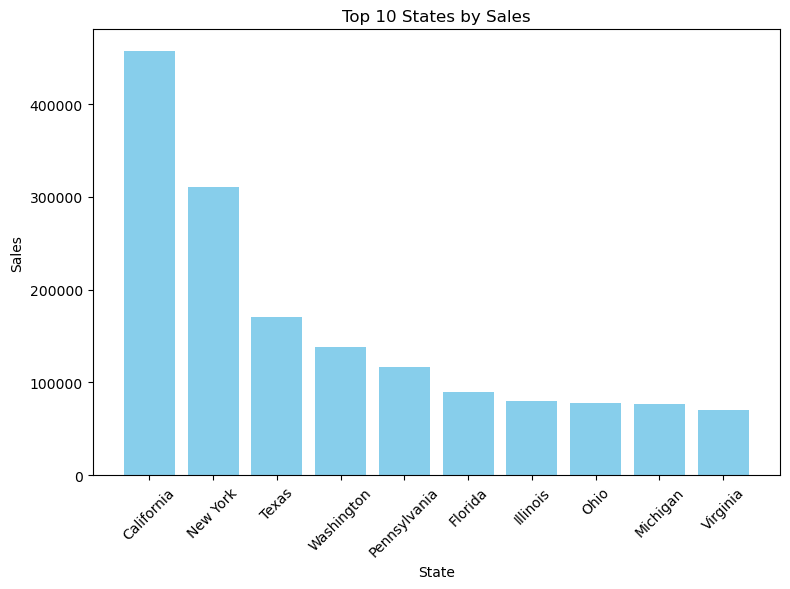

In [63]:
top_states = grouped_data.head(10)
plt.figure(figsize=(8,6))
plt.bar(top_states['State'], top_states['Sales'], color='skyblue')
plt.title("Top 10 States by Sales")
plt.xlabel("State")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


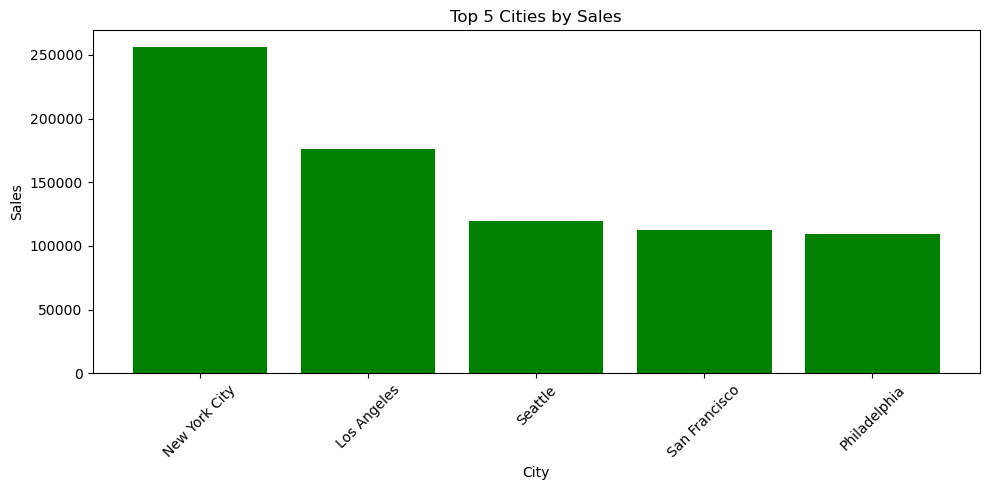

In [64]:
grouped_data = df_places.groupby(['City'], as_index=False).sum()
grouped_data.sort_values(by='Sales', ascending=False, inplace=True)
top_5_cities = grouped_data.head(5)
plt.figure(figsize=(10,5))
plt.bar(top_5_cities['City'], top_5_cities['Sales'], color='green', align='center')
plt.xlabel("City")
plt.ylabel("Sales")
plt.title("Top 5 Cities by Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top placies are :
Cities: [New York City, Los Angeles, Seattle, San Francisco, Detroit]

State : [california, New York]

Region : [West]

In [66]:
sales_by_category = df.groupby('Category')['Sales'].sum().reset_index()
print("Total Sales by Product Category:")
print(sales_by_category)

Total Sales by Product Category:
          Category        Sales
0        Furniture  741999.7953
1  Office Supplies  719047.0320
2       Technology  836154.0330


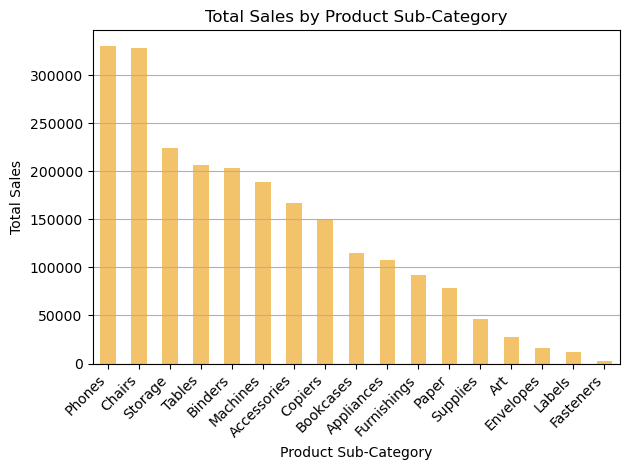

In [67]:
subcategory_sales = df.groupby(['Sub-Category'])['Sales'].sum().sort_values(ascending=False)
subcategory_sales.plot(kind='bar', color='#F2C36B')
plt.title('Total Sales by Product Sub-Category')
plt.xlabel('Product Sub-Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Customer types')

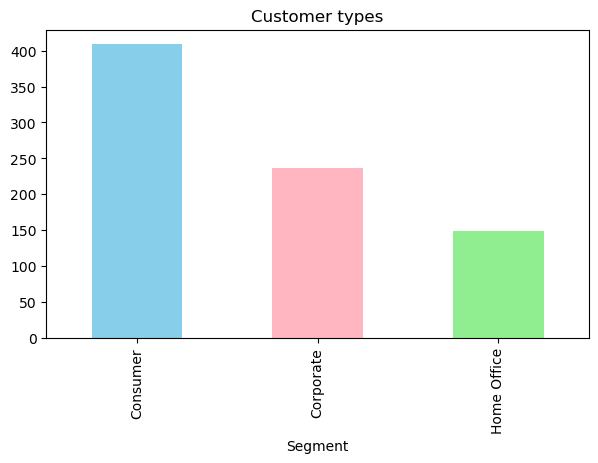

In [68]:
#Which segment buys the most?
segment_counts = df.groupby("Segment")["Customer ID"].nunique()

plt.figure(figsize=(7, 4))
segment_counts.plot(kind="bar", color=["skyblue", "lightpink", "lightgreen"])

plt.title("Customer types")

In [69]:
#Hightest sales vs. its profit
product_perf = df.groupby('Product Name')[['Sales', 'Profit']].sum()
low_profit_high_sales = product_perf[(product_perf['Sales'] > product_perf['Sales'].median()) & (product_perf['Profit'] < 0)]
low_profit_high_sales.sort_values(by='Sales', ascending=False).head()

Sales     Profit
Product Name                                                            
Cisco TelePresence System EX90 Videoconferencin...  22638.480 -1811.0784
GBC DocuBind P400 Electric Binding System           17965.068 -1878.1662
High Speed Automatic Electric Letter Opener         17030.312  -262.0048
Lexmark MX611dhe Monochrome Laser Printer           16829.901 -4589.9730
Martin Yale Chadless Opener Electric Letter Opener  16656.200 -1299.1836

In [70]:
df.Discount.value_counts()

Discount
0.00    4798
0.20    3657
0.70     418
0.80     300
0.30     227
0.40     206
0.60     138
0.10      94
0.50      66
0.15      52
0.32      27
0.45      11
Name: count, dtype: int64

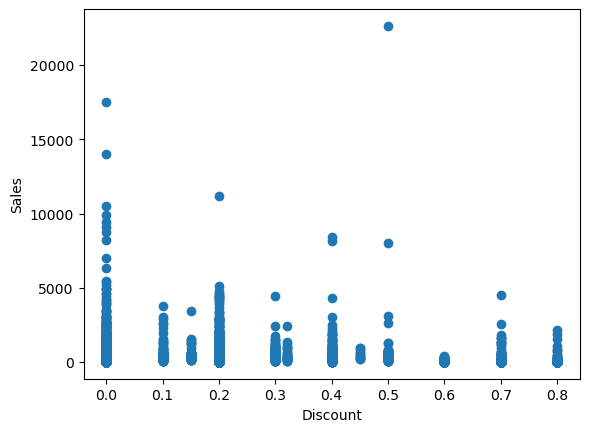

In [273]:
plt.scatter(df['Discount'], df['Sales'])
plt.xlabel("Discount")
plt.ylabel("Sales")
plt.show()

Text(0.5, 1.0, 'Total sales by Customer')

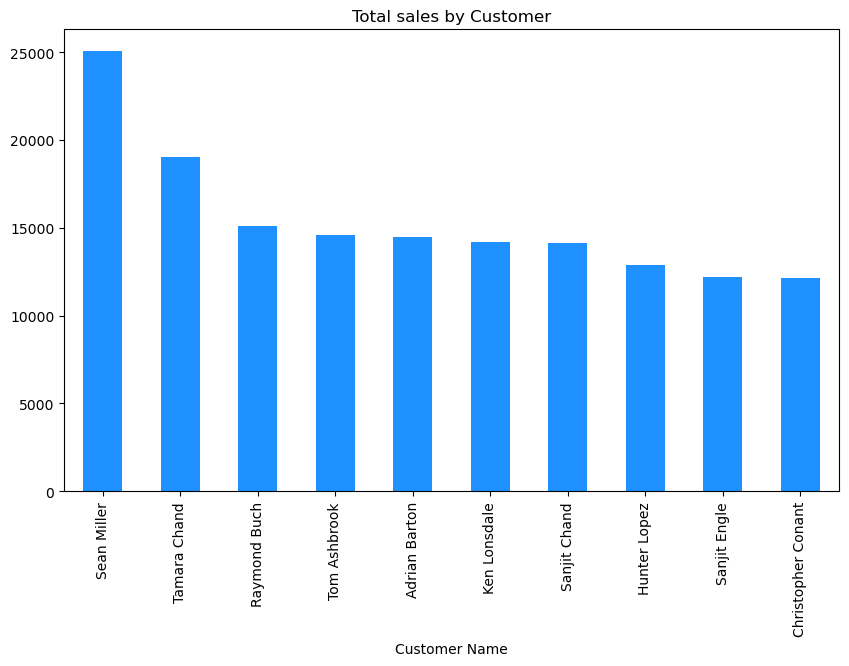

In [277]:
#Which customers spent the most money overall?
customer_sales = df.groupby("Customer Name")["Sales"].sum() #total sales by customer

sorted_sales = customer_sales.sort_values(ascending=False)

top_10_sales = sorted_sales.head(10)

plt.figure(figsize=(10, 6))
top_10_sales.plot(kind='bar', color='dodgerblue')

plt.title("Total sales by Customer")

Text(0.5, 1.0, 'Total profit by Customer')

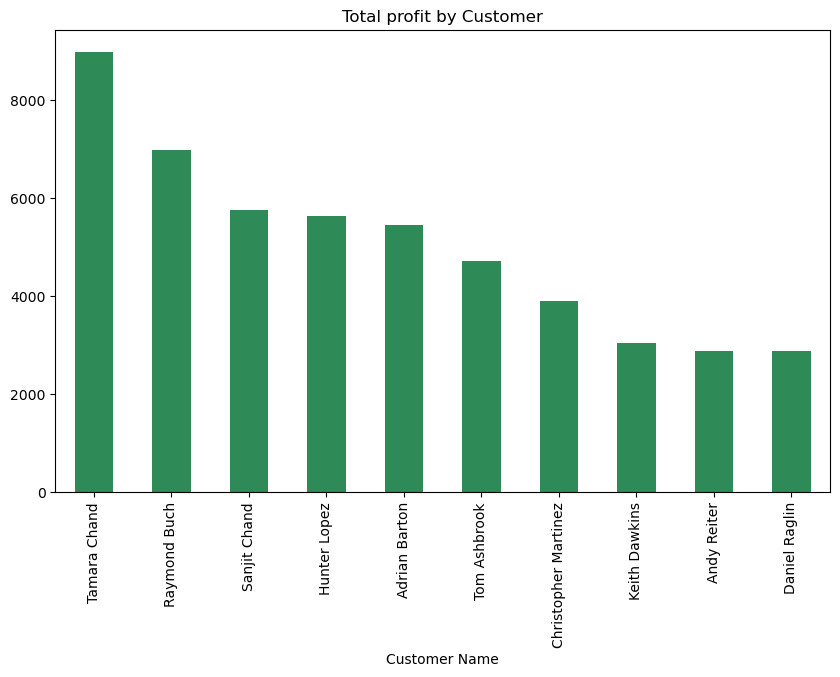

In [275]:

#Which segment is the most profitable?
customer_profit = df.groupby("Customer Name")["Profit"].sum() #total profit by customer

sorted_profit = customer_profit.sort_values(ascending=False)

top_10_customers = sorted_profit.head(10)

plt.figure(figsize=(10, 6))
top_10_customers.plot(kind='bar', color='seagreen')

plt.title("Total profit by Customer")

Text(0.5, 1.0, 'Total Sales vs. Total Profit per Customer')

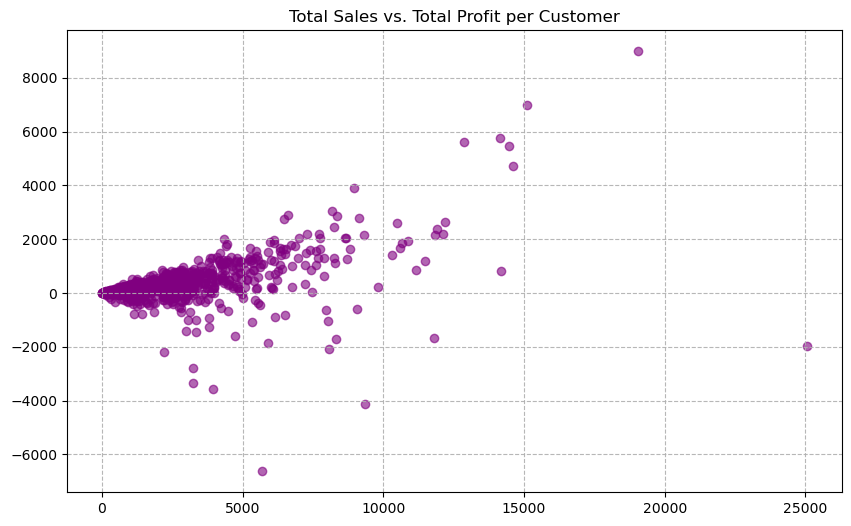

In [78]:
#Do customers who spend more also bring more profit?
customer_data = df.groupby("Customer Name")[["Sales", "Profit"]].sum()

plt.figure(figsize=(10, 6))
plt.scatter(customer_data["Sales"], customer_data["Profit"], color="purple", alpha=0.6)

plt.grid(True, linestyle='--', alpha=0.9)

plt.title("Total Sales vs. Total Profit per Customer")

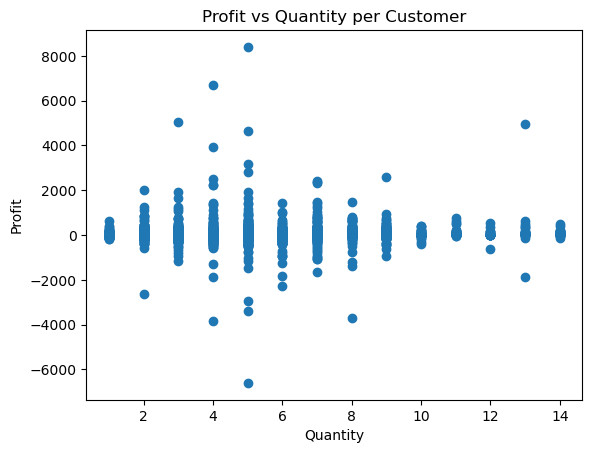

In [79]:
plt.scatter(df['Quantity'], df['Profit'])
plt.xlabel('Quantity')
plt.ylabel('Profit')
plt.title('Profit vs Quantity per Customer')
plt.show()

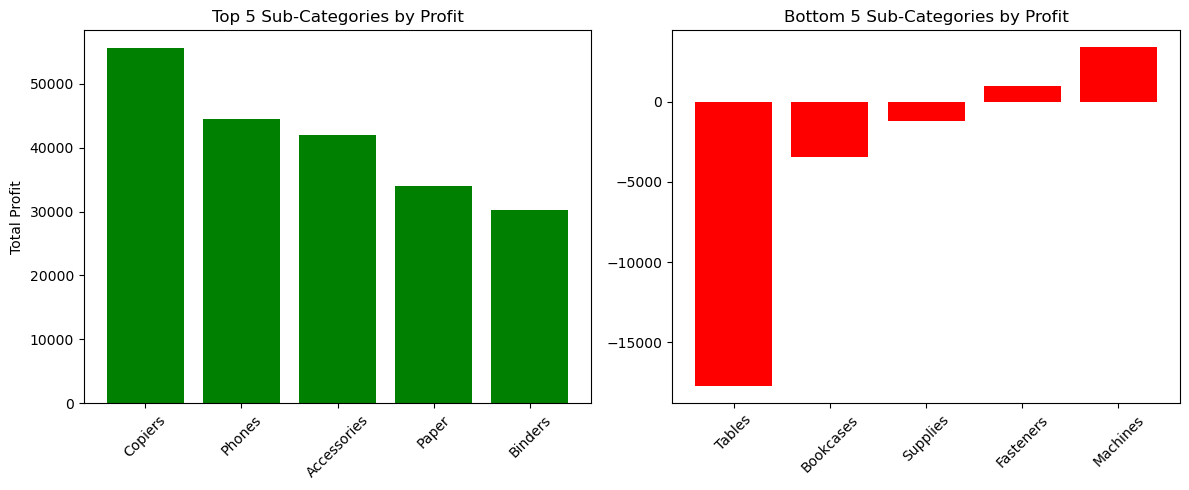

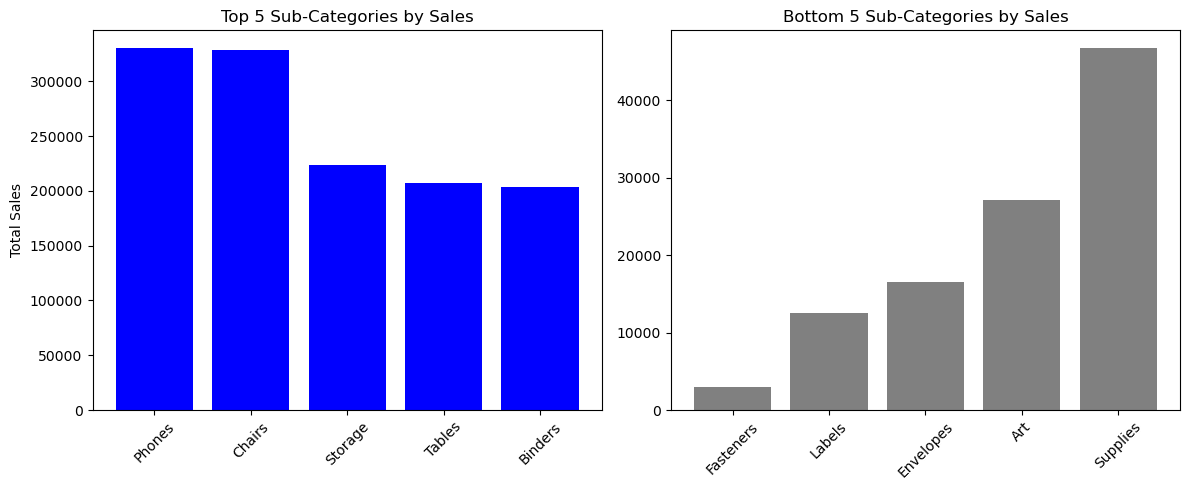

In [80]:
#Best- and worst-performing categories and sub-categories.
category_data = df.groupby(["Category", "Sub-Category"])[["Sales", "Profit"]].sum()

category_data = category_data.reset_index()
#top & bottom (profit)
top5_profit = category_data.sort_values(by="Profit", ascending=False).head(5)
bottom5_profit = category_data.sort_values(by="Profit").head(5)

#top & bottom (sales)
top5_sales = category_data.sort_values(by="Sales", ascending=False).head(5)
bottom5_sales = category_data.sort_values(by="Sales").head(5)

# ---------- PLOT: Profit ----------
plt.figure(figsize=(12, 5))

# Top 5 Profit
plt.subplot(1, 2, 1)
plt.bar(top5_profit["Sub-Category"], top5_profit["Profit"], color="green")
plt.title("Top 5 Sub-Categories by Profit")
plt.xticks(rotation=45)
plt.ylabel("Total Profit")

# Bottom 5 Profit
plt.subplot(1, 2, 2)
plt.bar(bottom5_profit["Sub-Category"], bottom5_profit["Profit"], color="red")
plt.title("Bottom 5 Sub-Categories by Profit")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# ---------- PLOT: Sales ----------
plt.figure(figsize=(12, 5))

# Top 5 Sales
plt.subplot(1, 2, 1)
plt.bar(top5_sales["Sub-Category"], top5_sales["Sales"], color="blue")
plt.title("Top 5 Sub-Categories by Sales")
plt.xticks(rotation=45)
plt.ylabel("Total Sales")

# Bottom 5 Sales
plt.subplot(1, 2, 2)
plt.bar(bottom5_sales["Sub-Category"], bottom5_sales["Sales"], color="gray")
plt.title("Bottom 5 Sub-Categories by Sales")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [81]:
#Frequently sold items (high volume) VS. Slow movers (low sales/quantity)
product_qty = df.groupby("Product Name")["Quantity"].sum()

q25 = product_qty.quantile(0.25)  # 25% threshold
q75 = product_qty.quantile(0.75)  # 75% threshold

fast_movers = product_qty[product_qty >= q75]
slow_movers = product_qty[product_qty <= q25]

print(f"🔍 Total Unique Products: {len(product_qty)}")
print(f"📦 Fast-Moving Products (Top 25%): {len(fast_movers)}")
print(f"🐌 Slow-Moving Products (Bottom 25%): {len(slow_movers)}\n")

print("📦 Example Fast Movers:")
print(fast_movers.sort_values(ascending=False).head(10))

print("\n🐌 Example Slow Movers:")
print(slow_movers.sort_values().head(10))

🔍 Total Unique Products: 1850
📦 Fast-Moving Products (Top 25%): 471
🐌 Slow-Moving Products (Bottom 25%): 482

📦 Example Fast Movers:
Product Name
Staples                                                       215
Staple envelope                                               170
Easy-staple paper                                             150
Staples in misc. colors                                        86
KI Adjustable-Height Table                                     74
Storex Dura Pro Binders                                        71
Avery Non-Stick Binders                                        71
GBC Premium Transparent Covers with Diagonal Lined Pattern     67
Situations Contoured Folding Chairs, 4/Set                     64
Staple-based wall hangings                                     62
Name: Quantity, dtype: int64

🐌 Example Slow Movers:
Product Name
Xerox 20                                                                     1
Global Enterprise Series Seating Low-Back Swivel/

#### Category Performance

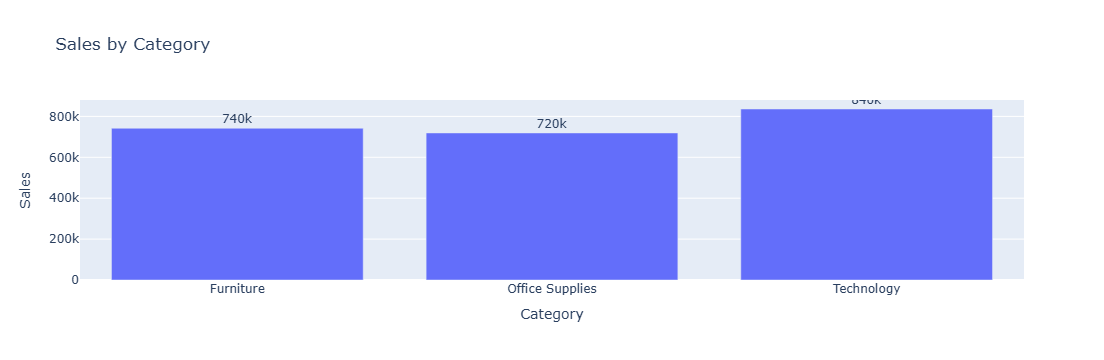

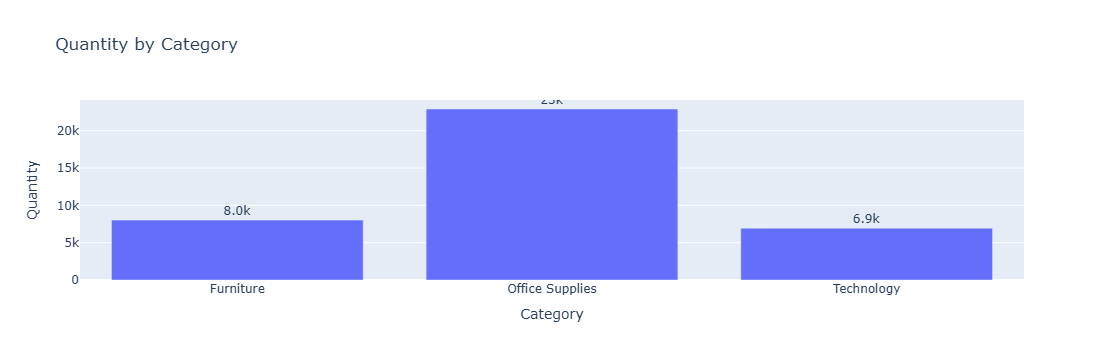

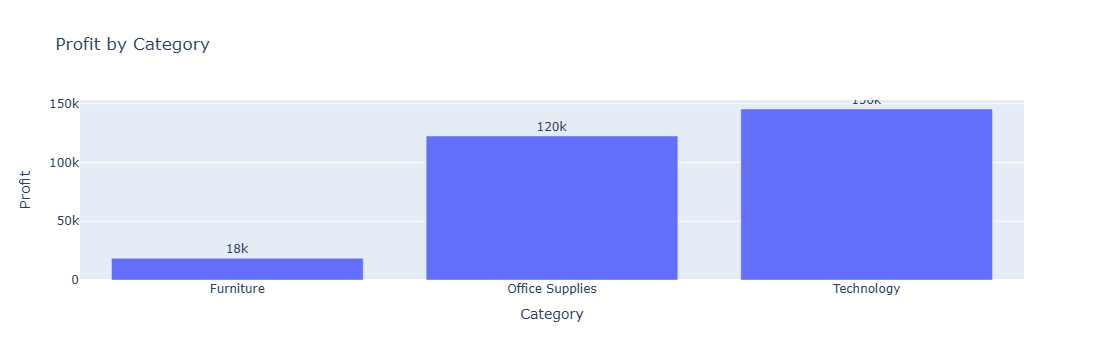

In [83]:
fig_sales = px.bar(
    category,
    x="Category",
    y="Sales",
    text="Sales",
    title="Sales by Category"
)
fig_sales.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig_sales.update_layout(yaxis_title="Sales", xaxis_title="Category")
fig_sales.show()


fig_quantity = px.bar(
    category,
    x="Category",
    y="Quantity",
    text="Quantity",
    title="Quantity by Category"
)
fig_quantity.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig_quantity.update_layout(yaxis_title="Quantity", xaxis_title="Category")
fig_quantity.show()


fig_profit = px.bar(
    category,
    x="Category",
    y="Profit",
    text="Profit",
    title="Profit by Category"
)
fig_profit.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig_profit.update_layout(yaxis_title="Profit", xaxis_title="Category")
fig_profit.show()


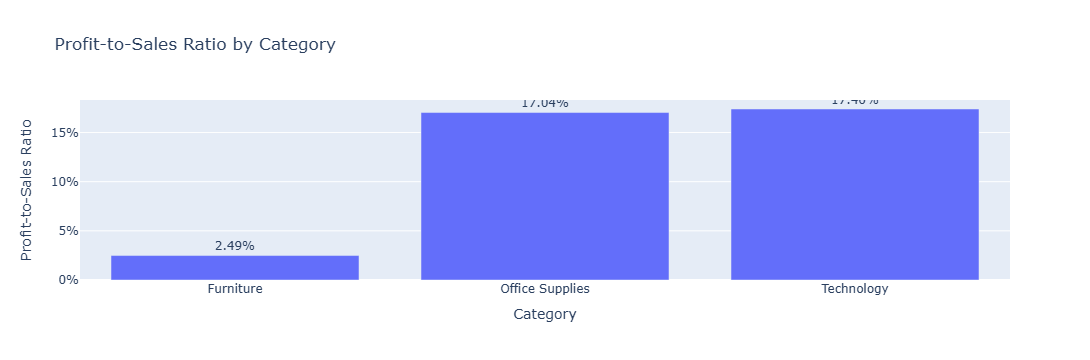

In [84]:
category["Profit_to_Sales"] = category["Profit"] / category["Sales"]


fig_ratio = px.bar(
    category,
    x="Category",
    y="Profit_to_Sales",
    text="Profit_to_Sales",
    title="Profit-to-Sales Ratio by Category"
)



fig_ratio.update_traces(texttemplate='%{text:.2%}', textposition='outside')
fig_ratio.update_layout(
    yaxis_title="Profit-to-Sales Ratio",
    xaxis_title="Category",
    yaxis_tickformat=".0%"
)

fig_ratio.show()

##### Here we can see that the highest profit belongs to the Technology category with the highest profit margin

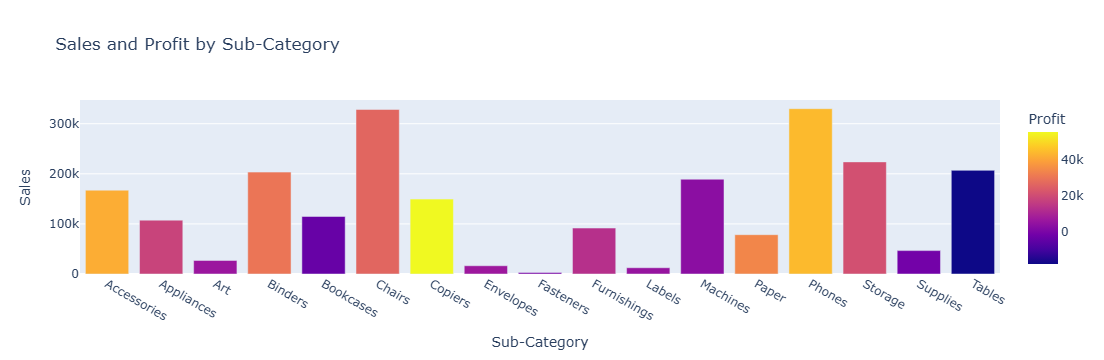

In [86]:
fig = px.bar(df.groupby('Sub-Category')[['Sales', 'Profit']].sum().reset_index(),
             x='Sub-Category', y='Sales', color='Profit',
             title = "Sales and Profit by Sub-Category",
                )
fig.show()


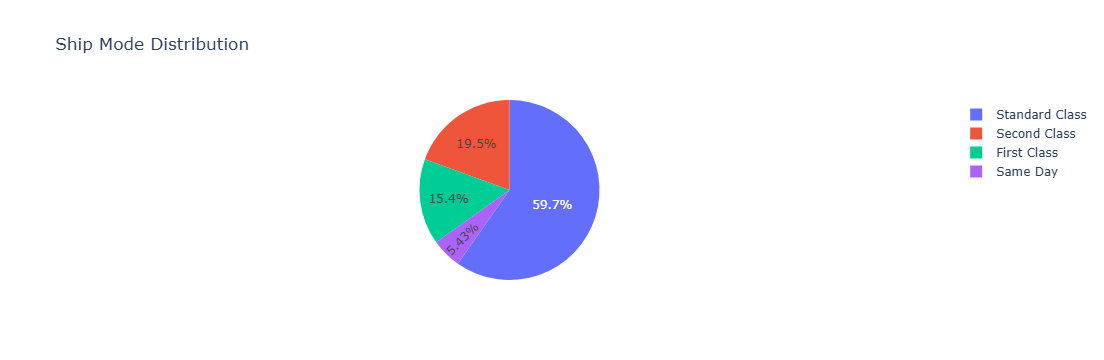

In [87]:
px.pie(df, names='Ship Mode', title='Ship Mode Distribution')

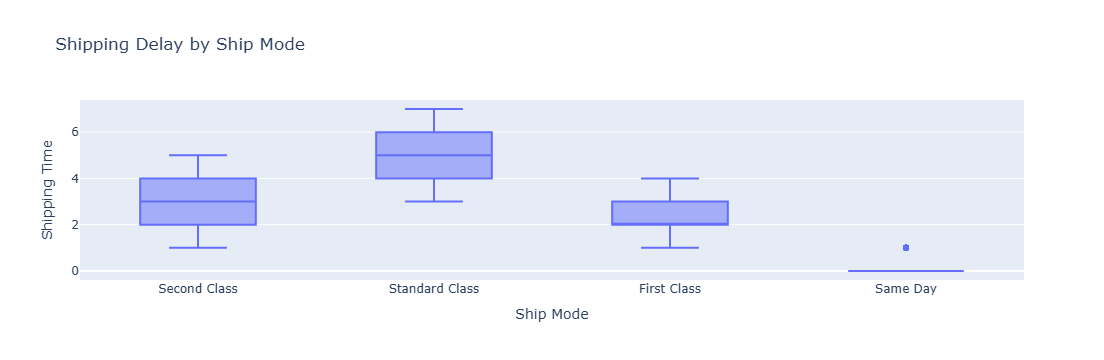

In [88]:
fig = px.box(df, x='Ship Mode', y='Shipping Time', title='Shipping Delay by Ship Mode')
fig.show()


#### Geographic Insights

In [90]:
us_state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH',
    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

state_summary['State Code'] = state_summary['State'].map(us_state_abbrev)


##### This mapping from State name to it's abbreviation bec:
"px.choropleth" works only on the 2 letter abbrev.

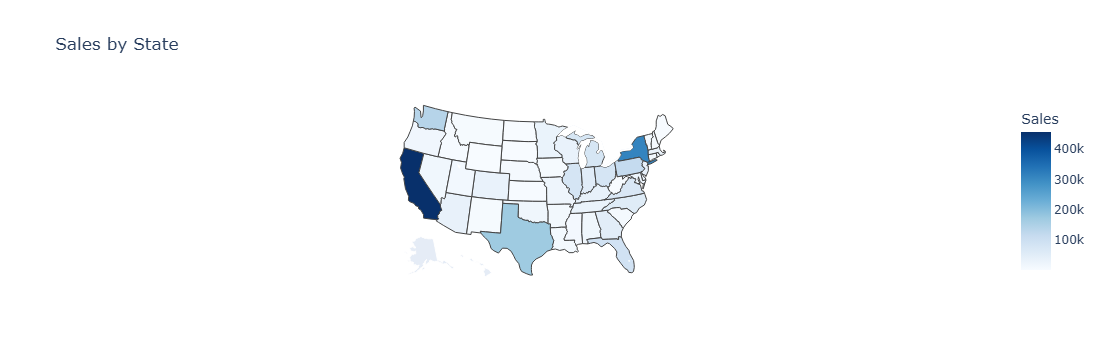

In [92]:
px.choropleth(state_summary,
                locations='State Code',
                locationmode='USA-states',
                color='Sales',
                scope='usa',
                hover_name='State',
                color_continuous_scale='Blues',
                title='Sales by State')

##### We can see that heavy sales are not centerlized 
and this means low sales are not due to low shipping performance as we see also from hipping Delay by Ship Mode graph

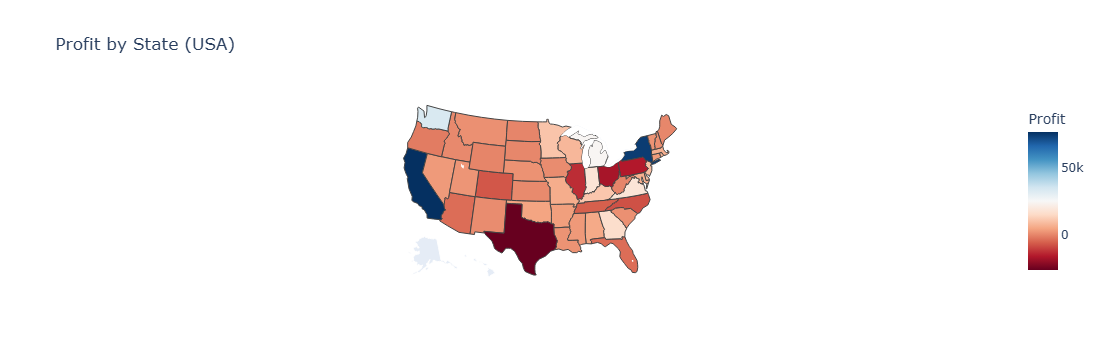

In [94]:
px.choropleth(state_summary,
                           locations='State Code',
                           locationmode='USA-states',
                           color='Profit',
                           scope='usa',
                           hover_name='State',
                           color_continuous_scale='RdBu',
                           title='Profit by State (USA)')

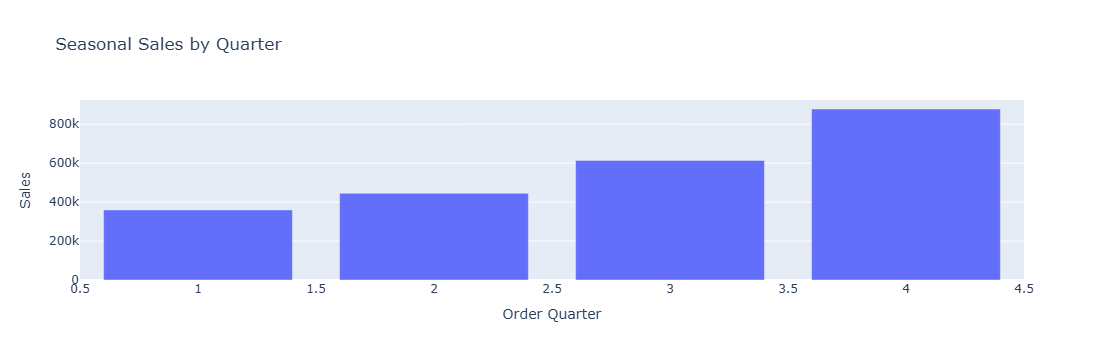

In [95]:
px.bar(df.groupby('Order Quarter')[['Sales', 'Profit']].sum().reset_index(),
       x='Order Quarter', 
       y='Sales', 
       title='Seasonal Sales by Quarter')

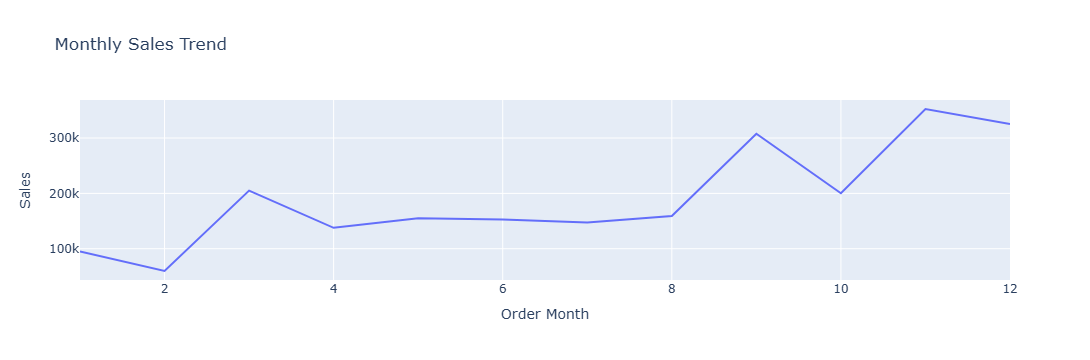

In [96]:
px.line(df.groupby('Order Month')[['Sales', 'Profit']].sum().reset_index(),
        x='Order Month', 
        y='Sales', 
        title='Monthly Sales Trend')

##### The market reaches it's peak in sales at the last quarter:
this may be caused by high discounts at the end of each year

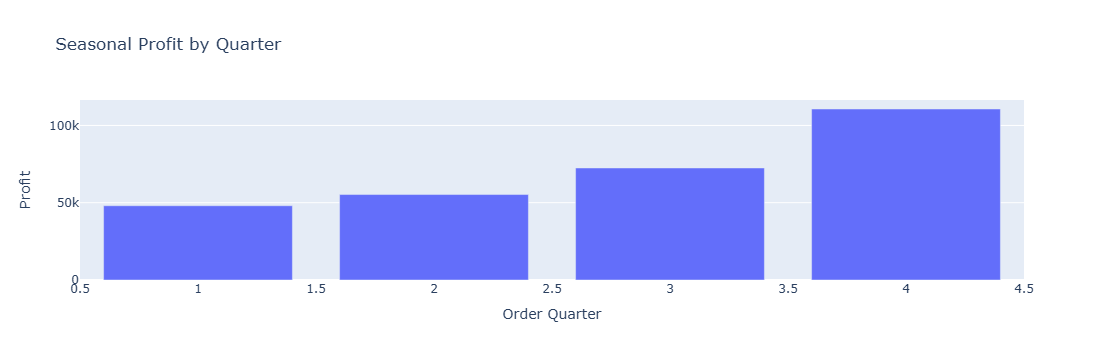

In [98]:
px.bar(df.groupby('Order Quarter')[['Sales', 'Profit']].sum().reset_index(),
       x='Order Quarter', 
       y='Profit', 
       title='Seasonal Profit by Quarter')

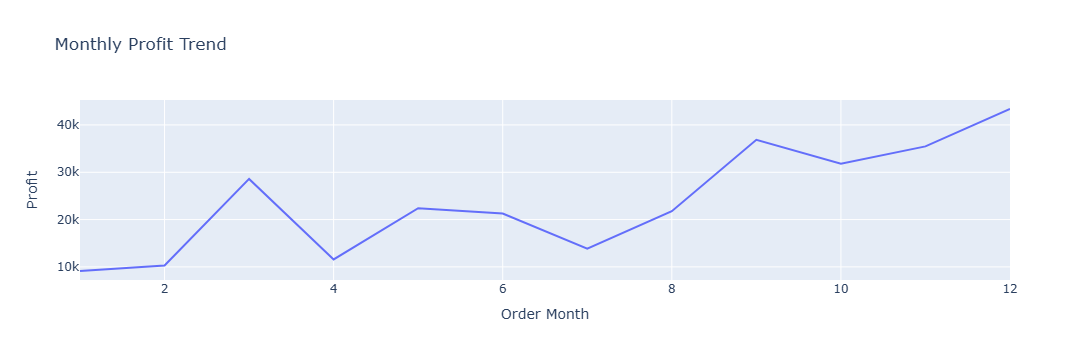

In [99]:
px.line(df.groupby('Order Month')[['Sales', 'Profit']].sum().reset_index(),
        x='Order Month', 
        y='Profit', 
        title='Monthly Profit Trend')

##### The profit also follows the same trens 

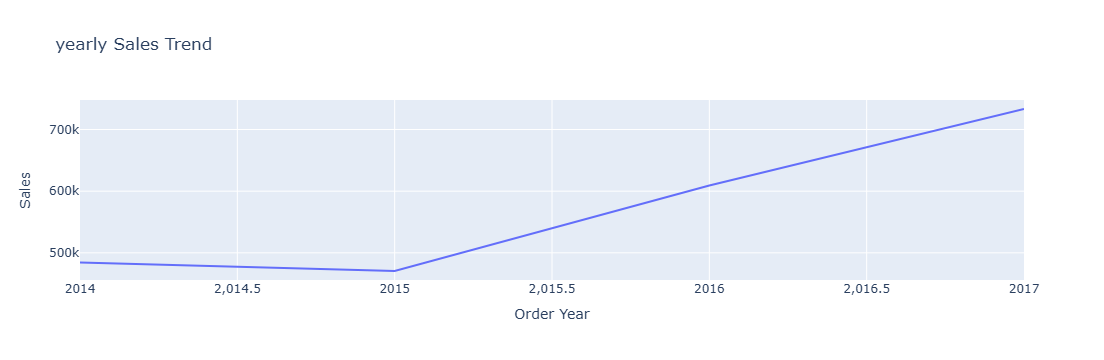

In [101]:
px.line(df.groupby('Order Year')[['Sales', 'Profit']].sum().reset_index(),
        x='Order Year', 
        y='Sales', 
        title='yearly Sales Trend')

#### RFM Analysis

| Metric        | What it means                           | Why it's useful                                    |
| ------------- | --------------------------------------- | -------------------------------------------------- |
| **Recency**   | How recently a customer made a purchase | Recent buyers are more likely to return.           |
| **Frequency** | How often a customer buys from you      | Frequent buyers are usually more loyal.            |
| **Monetary**  | How much money a customer spends        | High spenders may be your most valuable customers. |


In [104]:
reference_date = df['Order Date'].max() + pd.Timedelta(days=2)

In [105]:
reference_date

Timestamp('2018-01-01 00:00:00')

In [106]:
rfm = df.groupby('Customer ID').agg({
    'Order Date': lambda x: (reference_date - x.max()).days,  # Recency
    'Order ID': 'nunique',                                    # Frequency
    'Sales': 'sum'                                            # Monetary
}).reset_index()

In [107]:
rfm.columns = ['Customer ID', 'Recency', 'Frequency', 'Monetary']

In [108]:
rfm

Customer ID  Recency  Frequency  Monetary
0      AA-10315      186          5  5563.560
1      AA-10375       21          9  1056.390
2      AA-10480      261          4  1790.512
3      AA-10645       57          6  5086.935
4      AB-10015      417          3   886.156
..          ...      ...        ...       ...
788    XP-21865       45         11  2374.658
789    YC-21895        6          5  5454.350
790    YS-21880       11          8  6720.444
791    ZC-21910       56         13  8025.707
792    ZD-21925      204          5  1493.944

[793 rows x 4 columns]

In [109]:
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1]).astype(int)

rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5]).astype(int)

rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5]).astype(int)

In [110]:
rfm['RFM_Score'] = (
    rfm['R_Score'].astype(str) + 
    rfm['F_Score'].astype(str) + 
    rfm['M_Score'].astype(str)
)


In [111]:
rfm

Customer ID  Recency  Frequency  Monetary  R_Score  F_Score  M_Score  \
0      AA-10315      186          5  5563.560        2        2        5   
1      AA-10375       21          9  1056.390        5        5        2   
2      AA-10480      261          4  1790.512        1        1        3   
3      AA-10645       57          6  5086.935        3        3        5   
4      AB-10015      417          3   886.156        1        1        1   
..          ...      ...        ...       ...      ...      ...      ...   
788    XP-21865       45         11  2374.658        4        5        3   
789    YC-21895        6          5  5454.350        5        3        5   
790    YS-21880       11          8  6720.444        5        4        5   
791    ZC-21910       56         13  8025.707        3        5        5   
792    ZD-21925      204          5  1493.944        2        3        2   

    RFM_Score  
0         225  
1         552  
2         113  
3         335  
4         111  
..        ...  
788       453  
789       535  
790       545  
791       355  
792       232  

[793 rows x 8 columns]

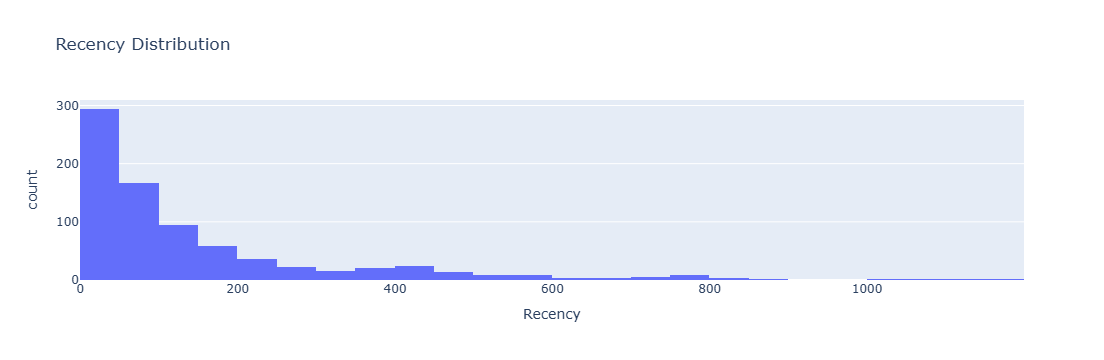

In [112]:
px.histogram(rfm, x='Recency', nbins=30, title='Recency Distribution')

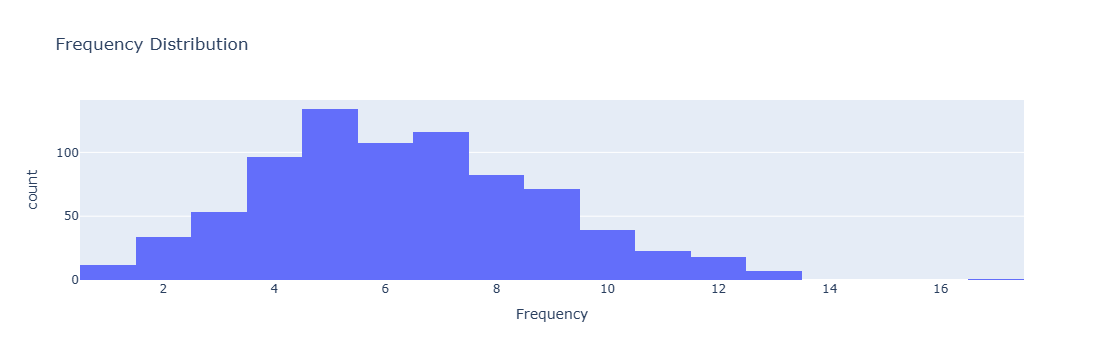

In [113]:
px.histogram(rfm, x='Frequency', nbins=30, title='Frequency Distribution')

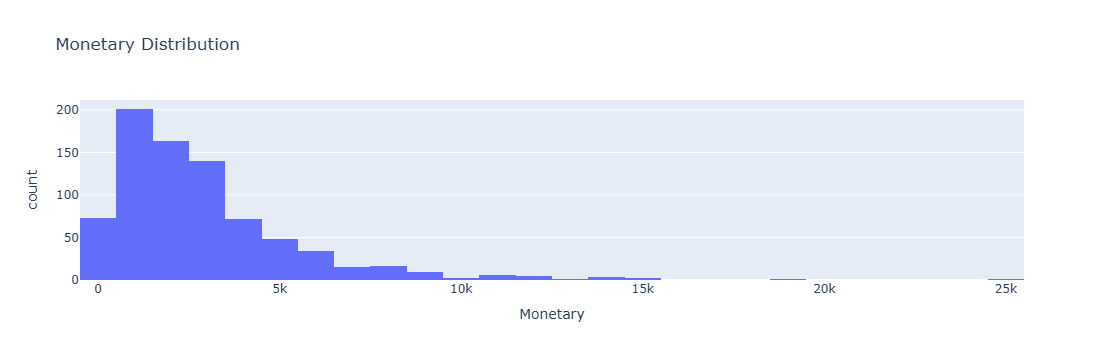

In [114]:
px.histogram(rfm, x='Monetary', nbins=30, title='Monetary Distribution')

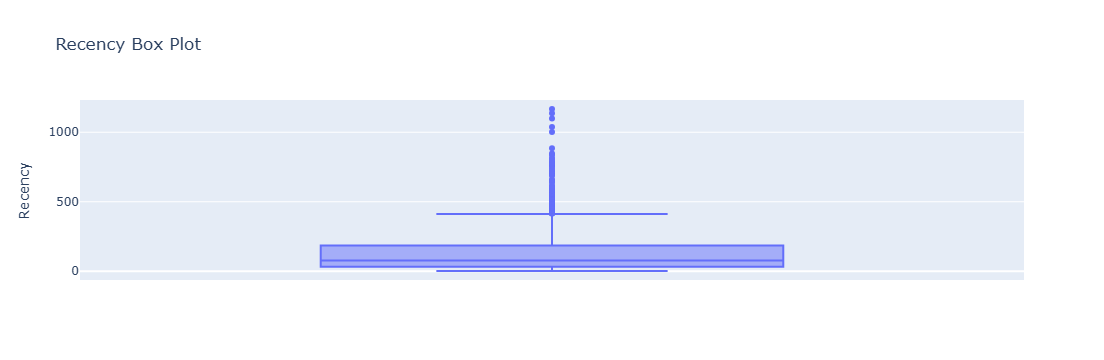

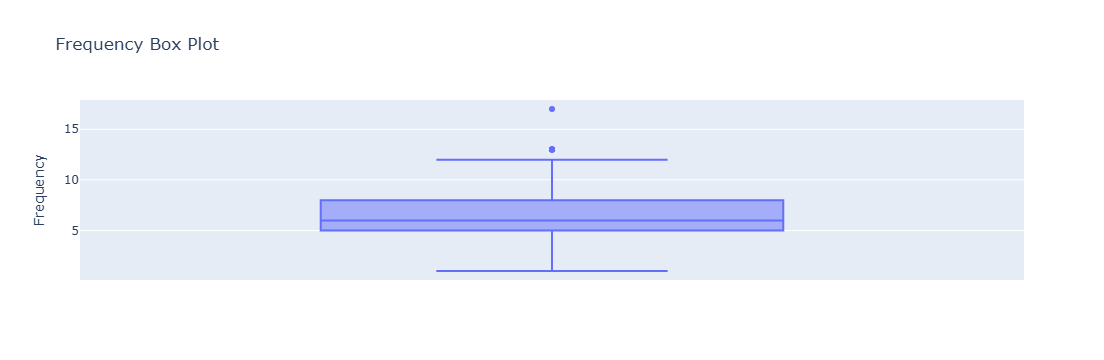

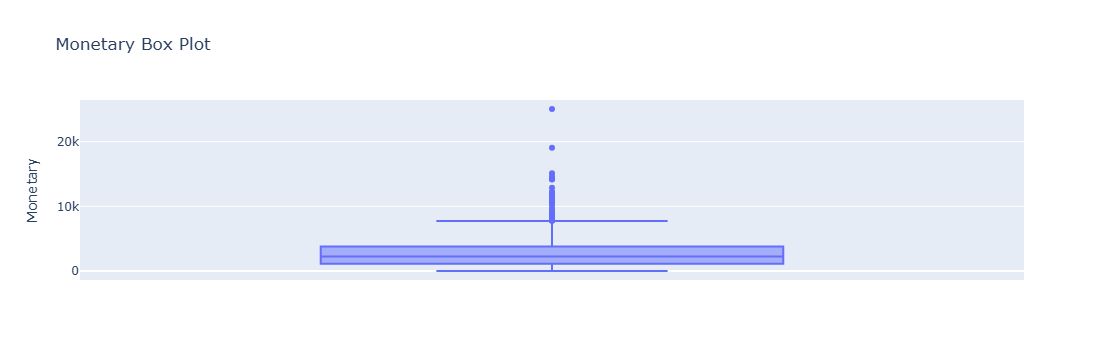

In [115]:
fig = px.box(rfm, y='Recency', title='Recency Box Plot')
fig.show()

fig = px.box(rfm, y='Frequency', title='Frequency Box Plot')
fig.show()

fig = px.box(rfm, y='Monetary', title='Monetary Box Plot')
fig.show()


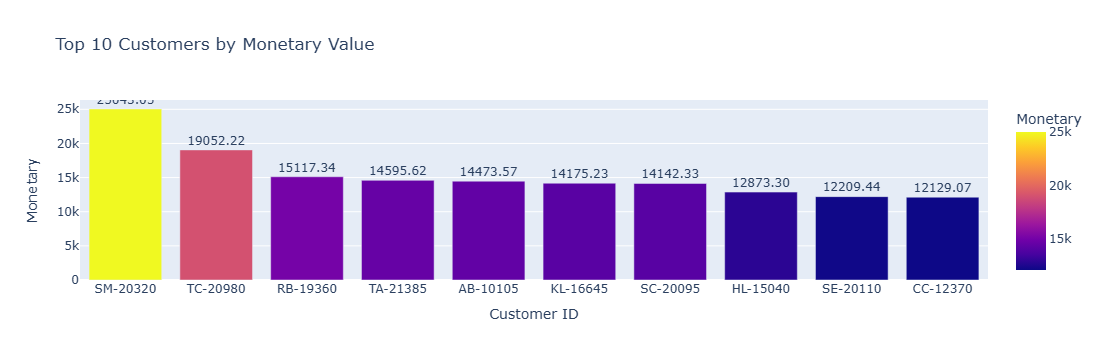

In [116]:
top_monetary = rfm.sort_values(by='Monetary', ascending=False).head(10)

fig = px.bar(top_monetary,
             x='Customer ID', y='Monetary',
             title='Top 10 Customers by Monetary Value',
             text='Monetary',
             color='Monetary')
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.show()

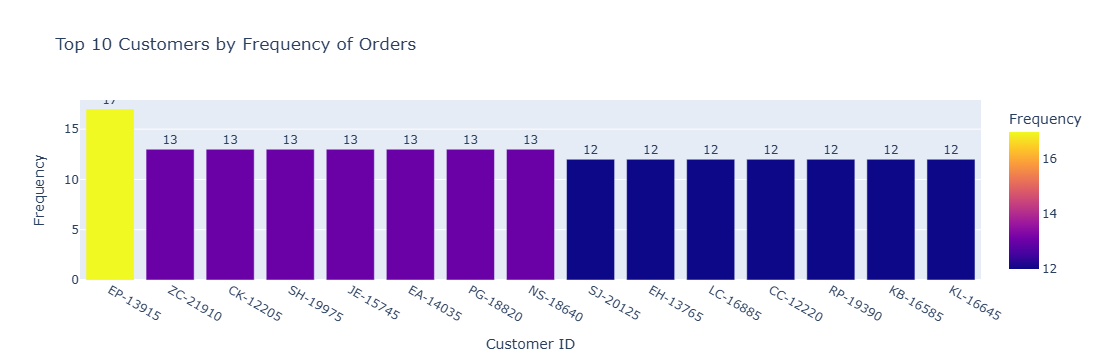

In [117]:
top_freq = rfm.sort_values(by='Frequency', ascending=False).head(15)

fig = px.bar(top_freq,
             x='Customer ID', y='Frequency',
             title='Top 10 Customers by Frequency of Orders',
             text='Frequency',
             color='Frequency')
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.show()


## Machine Learning

In [119]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

#### The data frame to cluser customers based on RFM

In [121]:
ML = df.groupby("Customer ID").agg({
    "Order Date": lambda x: (reference_date - x.max()).days,  # Recency
    "Order ID": "nunique",   
    "Sales": "sum",          
    "Discount": "mean",      
    "Profit": "sum",
    "Quantity": "sum"
}).rename(columns={
    "Order Date": "Recency",
    "Order ID": "Frequency",
    "Sales": "Monetary",
    "Discount": "AvgDiscount",
    "Profit": "TotalProfit",
    "Quantity": "TotalQuantity"
}).reset_index()

In [122]:
ML["AvgOrderValue"] = ML["Monetary"] / ML["Frequency"]
ML["ProfitMargin"] = ML["TotalProfit"] / ML["Monetary"]

In [123]:
# First, get order dates per customer
order_dates = df.sort_values("Order Date").groupby("Customer ID")["Order Date"].apply(list)

# Now calculate average gap
def avg_order_gap(dates):
    if len(dates) < 2:
        return np.nan
    gaps = pd.Series(dates).diff().dt.days.dropna()
    return gaps.mean()

ML["AvgOrderGap"] = order_dates.apply(avg_order_gap).values

In [124]:
#### DF for the model

In [241]:
features = ML.drop(["Customer ID", "TotalQuantity", "AvgOrderValue", "AvgOrderGap", "ProfitMargin", "TotalProfit", "AvgDiscount"], axis=1).copy()

In [243]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    793 non-null    int64  
 1   Frequency  793 non-null    int64  
 2   Monetary   793 non-null    float64
 3   Cluster    793 non-null    int32  
dtypes: float64(1), int32(1), int64(2)
memory usage: 21.8 KB


In [245]:
features.fillna(features.mean(), inplace=True)

In [247]:
scaled_features = StandardScaler().fit_transform(features)

In [249]:
kmeans = KMeans(n_clusters=3, random_state=42)
ML["Cluster"] = kmeans.fit_predict(scaled_features)

C:\Users\PanDa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.



In [250]:
ML

Customer ID  Recency  Frequency  Monetary  AvgDiscount  TotalProfit  \
0      AA-10315      186          5  5563.560     0.090909    -362.8825   
1      AA-10375       21          9  1056.390     0.080000     277.3824   
2      AA-10480      261          4  1790.512     0.016667     435.8274   
3      AA-10645       57          6  5086.935     0.063889     857.8033   
4      AB-10015      417          3   886.156     0.066667     129.3465   
..          ...      ...        ...       ...          ...          ...   
788    XP-21865       45         11  2374.658     0.046429     621.2300   
789    YC-21895        6          5  5454.350     0.075000    1305.6290   
790    YS-21880       11          8  6720.444     0.050000    1778.2923   
791    ZC-21910       56         13  8025.707     0.254839   -1032.1490   
792    ZD-21925      204          5  1493.944     0.111111     249.1307   

     TotalQuantity  AvgOrderValue  ProfitMargin  AvgOrderGap  Cluster  
0               30    1112.712000     -0.065225   118.600000        1  
1               41     117.376667      0.262576    95.000000        1  
2               36     447.628000      0.243409    97.909091        1  
3               64     847.822500      0.168629    72.470588        0  
4               13     295.385333      0.145964   199.200000        2  
..             ...            ...           ...          ...      ...  
788            100     215.878000      0.261608    51.740741        0  
789             31    1090.870000      0.239374   162.142857        1  
790             58     840.055500      0.264609    97.636364        0  
791            105     617.362077     -0.128605    37.333333        0  
792             32     298.788800      0.166760   127.375000        1  

[793 rows x 11 columns]

In [253]:
ML_numeric = ML.drop(columns=["Customer ID", "AvgDiscount", "TotalProfit", "TotalQuantity", "AvgOrderValue", "ProfitMargin", "AvgOrderGap"], errors="ignore")

cluster_summary = ML_numeric.groupby(ML["Cluster"]).mean()

In [255]:
cluster_summary

Recency  Frequency     Monetary  Cluster
Cluster                                             
0         80.037344   8.958506  5403.889333      0.0
1         89.823129   5.512472  1843.926364      1.0
2        532.423423   3.774775  1636.864907      2.0

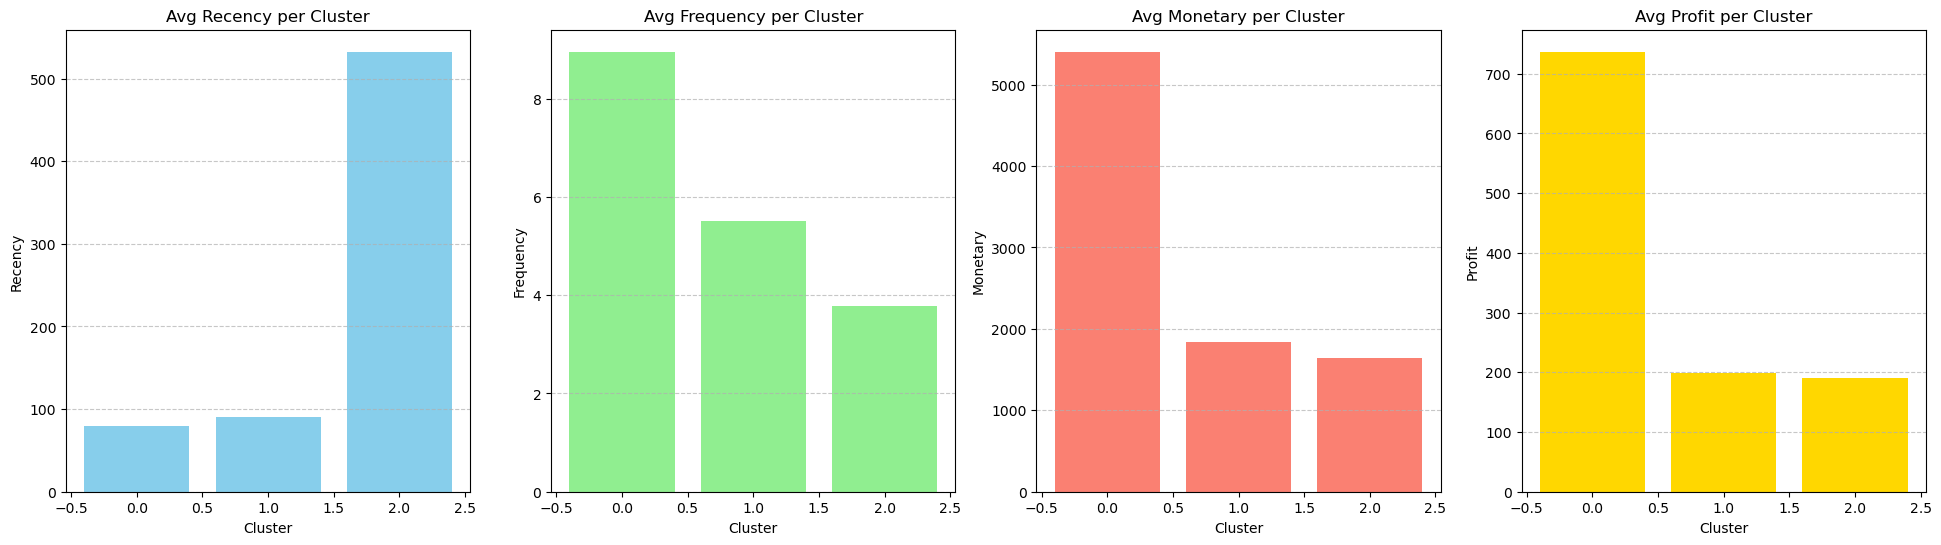

In [257]:
rfm_profit_avg = ML.groupby("Cluster")[["Recency", "Frequency", "Monetary", "TotalProfit"]].mean()


plt.figure(figsize=(24, 6))  




plt.subplot(1, 4, 1)
plt.bar(rfm_profit_avg.index, rfm_profit_avg["Recency"], color='skyblue')
plt.title("Avg Recency per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Recency")
plt.grid(axis='y', linestyle='--', alpha=0.7)




plt.subplot(1, 4, 2)
plt.bar(rfm_profit_avg.index, rfm_profit_avg["Frequency"], color='lightgreen')
plt.title("Avg Frequency per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)




plt.subplot(1, 4, 3)
plt.bar(rfm_profit_avg.index, rfm_profit_avg["Monetary"], color='salmon')
plt.title("Avg Monetary per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Monetary")
plt.grid(axis='y', linestyle='--', alpha=0.7)




plt.subplot(1, 4, 4)
plt.bar(rfm_profit_avg.index, rfm_profit_avg["TotalProfit"], color='gold')
plt.title("Avg Profit per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Profit")
plt.grid(axis='y', linestyle='--', alpha=0.7)




plt.show()

#### Scoring

##### I used it to try the features which gives a good score

In [261]:
from sklearn.metrics import silhouette_score
score = silhouette_score(scaled_features, kmeans.labels_)

In [263]:
score

0.5351112035706419

#### Searced accepting score: 

##### > 0.5 → Very good clustering

##### 0.3 to 0.5 → Acceptable in many real-world (noisy) datasets

##### < 0.3 → Often means overlapping or poor clustering

#### Plotting Clusters 
Searched

In [267]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

ML['PCA1'] = pca_components[:, 0]
ML['PCA2'] = pca_components[:, 1]

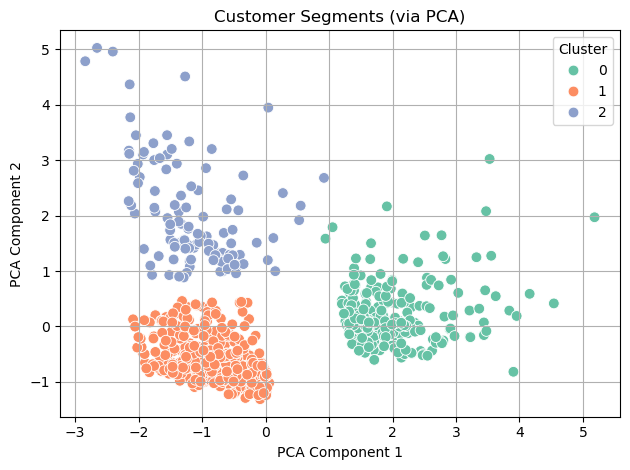

In [269]:


sns.scatterplot(data=ML, x="PCA1", y="PCA2", hue="Cluster", palette="Set2", s=60)
plt.title("Customer Segments (via PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()


#### usage 
We can use this clustering to make a specialized treat for each type of customers 

changing number of clusters "2" may produce a better score but this is more reasonable clustering for me 
as i see we've 3 types of customers "this may need further study for the dataset"